# 2nd solution for the digit recognizer competition

__Date:__ June 20, 2018

<font color = gray>_Created by Tyler Evans_</font>

***
### Abstract:
> This is my first attempt at the digit recognizer competition on Kaggle.
> 
> I have tried the housing prices competition (regression task) and the Titanic competition (binary classification task). This one is a multiclass classification task.

***

## 0. Setup the notebook.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1. Frame the problem and look at the big picture.

__Objective:__ Correctly identify digits from a dataset of tens of thousands of handwritten images.

__Type:__ supervised, multiclass classification task, batch learning

__Performance measure:__ categorization accuracy (proportion of test images that are correctly classified)

## 2. Get the data.

In [2]:
import pandas as pd

DIGIT_PATH = os.path.join("..", "data")

In [3]:
def load_digit_data(filename, digit_path=DIGIT_PATH):
    csv_path = os.path.join(digit_path, filename)
    return pd.read_csv(csv_path)

In [4]:
#Downloading the data

train_data = load_digit_data("train.csv")
test_data = load_digit_data("test.csv") #test data is already split

## 3. Explore the data to gain insights.

In [5]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Let's take out the label from each entry and make it into numpy arrays.

In [9]:
train_labels = train_data[['label']].copy().values

In [10]:
train_data = train_data.drop('label',axis=1).values

In [11]:
print(train_labels.shape,
type(train_labels))

(42000, 1) <type 'numpy.ndarray'>


In [12]:
print(train_data.shape,
type(train_data))

(42000, 784) <type 'numpy.ndarray'>


Let's see what an entry looks like.

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

n = 420

In [14]:
some_digit=train_data[n]
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  72, 214,  80,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  72, 254, 147,   0,   0,   

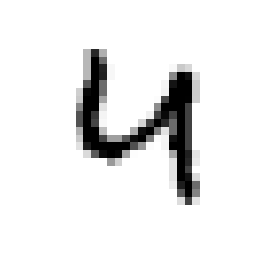

In [15]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

This looks like a 4. Let's make sure.

In [16]:
print(train_labels[n])

[4]


It is indeed a 4.

With this knowledge, I've decided to make more training data for the machine to learn from. I do this by shifting the numbers a couple pixels in a direction. It is the same number just a little to the left. or right or up or down.

In [17]:
from scipy.ndimage.interpolation import shift

In [18]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

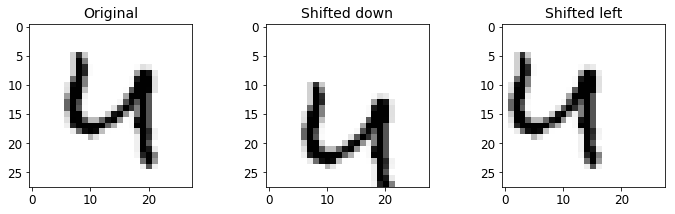

In [19]:
image = some_digit
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

This way I can have 5 times the amount of data, if I make more events with the image shifted left and right by a pixel.

In [20]:
X_train = [image for image in train_data]
y_train = [label for label in train_labels]

X_train_expanded = [image for image in train_data]
y_train_expanded = [label for label in train_labels]

for dx, dy in ((2, 0), (-2, 0)):
    for image, label in zip(train_data, train_labels):
        X_train_expanded.append(shift_image(image, dx, dy))
        y_train_expanded.append(label)

In [21]:
type(X_train)

list

In [22]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train_expanded = np.array(X_train_expanded)
y_train_expanded = np.array(y_train_expanded)

In [23]:
type(X_train)

numpy.ndarray

In [24]:
shuffle_idx = np.random.permutation(len(X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

shuffle_idx = np.random.permutation(len(X_train_expanded))
X_train_expanded = X_train_expanded[shuffle_idx]
y_train_expanded = y_train_expanded[shuffle_idx]

## 4. Prepare the data to better expose the underlying patters to ML algorithms.

The only thing to do is to normalize the variables.

In [25]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_train_expanded = StandardScaler().fit_transform(X_train_expanded)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 5. Explore many different models and short-list the best ones.

I will test LinearSVC on X_train

In [26]:
from sklearn.svm import LinearSVC, SVC

In [27]:
lin_clf = LinearSVC()
lin_clf.fit(X_train[:25000],np.ravel(y_train[:25000]))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [28]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9191666666666667

Now I will test SVC.

In [29]:
svm_clf = SVC(decision_function_shape="ovr")
svm_clf.fit(X_train[:7500], np.ravel(y_train[:7500]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred = svm_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9421428571428572

Since, SVC performs better, I will use it.

## 6. Fine-tune your models and combine them into a great solution.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=5.140464193697976, gamma=0.021057271493438397 .................


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=5.140464193697976, gamma=0.021057271493438397, total=   1.0s
[CV] C=5.140464193697976, gamma=0.021057271493438397 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .. C=5.140464193697976, gamma=0.021057271493438397, total=   1.0s
[CV] C=5.140464193697976, gamma=0.021057271493438397 .................
[CV] .. C=5.140464193697976, gamma=0.021057271493438397, total=   1.0s
[CV] C=10.091597441903016, gamma=0.001983007554920001 ................
[CV] . C=10.091597441903016, gamma=0.001983007554920001, total=   0.8s
[CV] C=10.091597441903016, gamma=0.001983007554920001 ................
[CV] . C=10.091597441903016, gamma=0.001983007554920001, total=   0.8s
[CV] C=10.091597441903016, gamma=0.001983007554920001 ................
[CV] . C=10.091597441903016, gamma=0.001983007554920001, total=   0.8s
[CV] C=6.602343536607309, gamma=0.018369370302419936 .................
[CV] .. C=6.602343536607309, gamma=0.018369370302419936, total=   1.0s
[CV] C=6.602343536607309, gamma=0.018369370302419936 .................
[CV] .. C=6.602343536607309, gamma=0.018369370302419936, total=   1.0s
[CV] C=6.602343536607309, gamma=0.018369370302419936 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   38.2s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={u'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffa523af350>, u'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffa523af450>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [32]:
rnd_search_cv.best_estimator_

SVC(C=8.945930081077105, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma=0.0013104811854772343,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
rnd_search_cv.best_score_

0.875

In [34]:
rnd_search_cv.best_estimator_.fit(X_train_expanded, y_train_expanded)

SVC(C=8.945930081077105, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma=0.0013104811854772343,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred)

0.9888333333333333

## 7. Present your solution.

In [36]:
X_test = test_data.values

In [37]:
X_test.shape

(28000, 784)

In [38]:
X_test = StandardScaler().fit_transform(X_test)

In [39]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)

In [40]:
type(y_pred)

numpy.ndarray

In [41]:
y_pred.astype(int)

array([2, 0, 9, ..., 3, 9, 2])

## 8. Launch, monitor, and maintain your system.

In [42]:
submission = pd.DataFrame({
    "ImageId": range(1,len(y_pred)+1),
    "Label": y_pred
})

In [43]:
submission.to_csv('submission2.csv', index=False)

***
## Appendix

Markdown examples: https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

Latex examples:
http://data-blog.udacity.com/posts/2016/10/latex-primer/